In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd


In [0]:
import tensorflow as tf

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
pd.set_option('display.max_columns',250) #for displaying all the column value

In [0]:
column_names = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/network_intrusion_data.csv',encoding = 'ISO-8859-1',header=None,names=column_names)

In [9]:
df[:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [10]:
df.shape

(494021, 42)

In [11]:
df.outcome.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [12]:
df.shape

(494021, 42)

In [13]:
df_clean = df.dropna() #drop any null value row
df.shape

(494021, 42)

In [0]:
df_unique = df_clean.drop_duplicates(keep='first', inplace=False) #removing dulicates

In [15]:
df.shape

(494021, 42)

In [0]:
def binary_label_encoding(label):
    if label=='normal.':
        return 0
    else:
        return 1
    

In [17]:
df_unique['binary_label']=df_unique.outcome.apply(binary_label_encoding)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_unique.shape

(145586, 43)

In [0]:
y_binary = df_unique['binary_label'].tolist()

In [20]:
y_binary = np.array(y_binary)
y_binary.shape


(145586,)

In [21]:
y_binary

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
outcome_list = df_unique['outcome'].tolist()

In [24]:
len(outcome_list)

145586

In [0]:
y_multilabel = le.fit_transform(outcome_list)

In [26]:
le.classes_

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype='<U16')

In [27]:
y_multilabel[1:5000]

array([11, 11, 11, ..., 11, 11, 11])

In [0]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [0]:
def min_max_normalization(df,name):
    
    max_value = df[name].max()
    min_value = df[name].min()
    
    new_column = "{}_{}".format('normalized',name)
    
    df[new_column] = (df[name] - min_value) / (max_value - min_value)
    df.drop(name,axis=1,inplace = True)   
            

In [30]:
encode_text_dummy(df_unique,'protocol_type')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df_unique.shape

(145586, 45)

In [32]:
encode_text_dummy(df_unique,'service')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
df_unique.shape

(145586, 110)

In [34]:
encode_text_dummy(df_unique,'flag')
df_unique.shape
encode_text_dummy(df_unique,'su_attempted')
df_unique.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(145586, 122)

In [35]:
df_unique.shape

(145586, 122)

In [36]:
df_unique[:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,binary_label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [0]:
numerical_features = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','num_root','num_file_creations','num_shells','num_access_files','count',
'srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']

In [38]:
df_unique.shape

(145586, 122)

In [39]:
for name in numerical_features:
    min_max_normalization(df_unique,name)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
df_unique.shape
df_unique[:10]

,land,logged_in,root_shell,num_outbound_cmds,is_host_login,is_guest_login,outcome,binary_label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,normalized_duration,normalized_src_bytes,normalized_dst_bytes,normalized_wrong_fragment,normalized_urgent,normalized_hot,normalized_num_failed_logins,normalized_num_compromised,normalized_num_root,normalized_num_file_creations,normalized_num_shells,normalized_num_access_files,normalized_count,normalized_srv_count,normalized_serror_rate,normalized_srv_serror_rate,normalized_rerror_rate,normalized_srv_rerror_rate,normalized_same_srv_rate,normalized_diff_srv_rate,normalized_srv_diff_host_rate,normalized_dst_host_count,normalized_dst_host_srv_count,normalized_dst_host_same_srv_rate,normalized_dst_host_diff_srv_rate,normalized_dst_host_same_src_port_rate,normalized_dst_host_srv_diff_host_rate,normalized_dst_host_serror_rate,normalized_dst_host_srv_serror_rate,normalized_dst_host_rerror_rate,normalized_dst_host_srv_rerror_rate
0,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,2.610418e-07,0.001057,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035294,0.035294,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.446905e-07,0.000094,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.074510,0.074510,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.389216e-07,0.000259,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.113725,0.113725,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.158461e-07,0.000259,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.152941,0.152941,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.129617e-07,0.000394,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.192157,0.192157,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0
5,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
#del df_unique['is_host_login']
#del df_unique['num_outbound_cmds']
#df_unique.shape

In [42]:
df_outcome = df_unique[['outcome','binary_label']]
df_outcome.shape
df_unique.shape

(145586, 122)

In [0]:
del df_unique['outcome']
del df_unique['binary_label']

In [44]:
df_unique.shape


(145586, 120)

In [45]:
df_unique[:5]

,land,logged_in,root_shell,num_outbound_cmds,is_host_login,is_guest_login,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,normalized_duration,normalized_src_bytes,normalized_dst_bytes,normalized_wrong_fragment,normalized_urgent,normalized_hot,normalized_num_failed_logins,normalized_num_compromised,normalized_num_root,normalized_num_file_creations,normalized_num_shells,normalized_num_access_files,normalized_count,normalized_srv_count,normalized_serror_rate,normalized_srv_serror_rate,normalized_rerror_rate,normalized_srv_rerror_rate,normalized_same_srv_rate,normalized_diff_srv_rate,normalized_srv_diff_host_rate,normalized_dst_host_count,normalized_dst_host_srv_count,normalized_dst_host_same_srv_rate,normalized_dst_host_diff_srv_rate,normalized_dst_host_same_src_port_rate,normalized_dst_host_srv_diff_host_rate,normalized_dst_host_serror_rate,normalized_dst_host_srv_serror_rate,normalized_dst_host_rerror_rate,normalized_dst_host_srv_rerror_rate
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [0]:
X=df_unique.as_matrix(columns=None)

In [47]:
X.shape

(145586, 120)

In [48]:
y_binary.shape

(145586,)

# **Test & Split**

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_binary,test_size=0.18,random_state=1)

# **Training & Evaluating Models**

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

## **KNN**

In [51]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

test :  [0 1 0 1 0 1 0 0 0 1]
pred :  [0 1 0 1 0 1 0 0 0 1]

[[15760    20]
 [   30 10396]]

Precision Score::  0.9980798771121352
Recall Score   ::  0.9971225781699598
F1 Score       ::  0.9976009979848383

Plotting confusion matrix


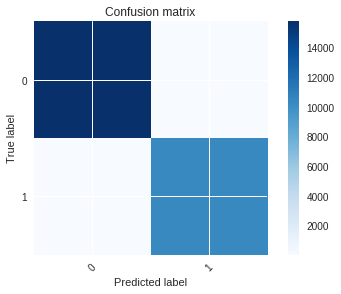


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15780
           1       1.00      1.00      1.00     10426

   micro avg       1.00      1.00      1.00     26206
   macro avg       1.00      1.00      1.00     26206
weighted avg       1.00      1.00      1.00     26206



In [52]:
y_pred_knn = clf_knn.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_knn[:10])

print()

cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_knn))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_knn))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_knn)) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_knn, clf_knn.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_knn))


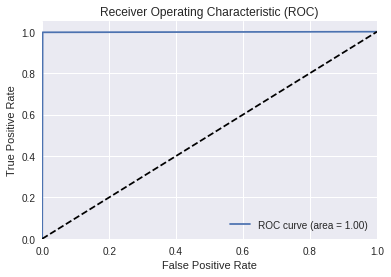

In [53]:
plot_roc(y_pred_knn,y_test)

## **Guassian Naive Bayes**

In [54]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

test :  [0 1 0 1 0 1 0 0 0 1]
pred :  [0 0 0 1 0 1 0 0 0 1]

[[15735    45]
 [ 2107  8319]]

Precision Score::  0.9946197991391679
Recall Score   ::  0.7979090734701707
F1 Score       ::  0.8854709952102182

Plotting confusion matrix


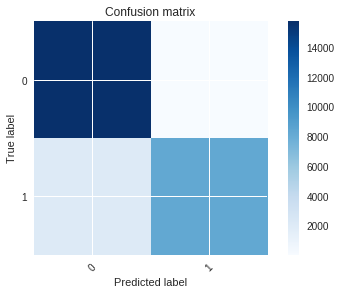


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     15780
           1       0.99      0.80      0.89     10426

   micro avg       0.92      0.92      0.92     26206
   macro avg       0.94      0.90      0.91     26206
weighted avg       0.93      0.92      0.92     26206



In [55]:
y_pred_gnb = clf_gnb.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_gnb[:10])

print()

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print(cm_gnb)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_gnb))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_gnb))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_gnb)) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_gnb, clf_gnb.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_gnb))

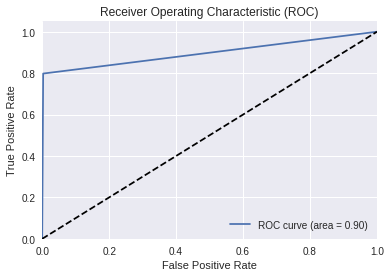

In [56]:
plot_roc(y_pred_gnb,y_test)

## **SVM**

In [57]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

test :  [0 1 0 1 0 1 0 0 0 1]
pred :  [0 1 0 1 0 1 0 0 0 1]

[[15695    85]
 [  334 10092]]

Precision Score::  0.9916478333497102
Recall Score::     0.9679647036255515
F1 Score::         0.9796631558510898

Plotting confusion matrix


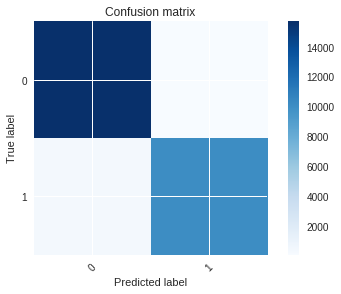


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     15780
           1       0.99      0.97      0.98     10426

   micro avg       0.98      0.98      0.98     26206
   macro avg       0.99      0.98      0.98     26206
weighted avg       0.98      0.98      0.98     26206



In [58]:
y_pred_svm = clf_svc.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_svm[:10])

print()

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_svm))   
print("Recall Score::    ",metrics.recall_score(y_test,y_pred_svm))      
print("F1 Score::        ",metrics.f1_score(y_test,y_pred_svm)) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_svm, clf_svc.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_svm))

## **Logistic Regression**

In [59]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

test :  [0 1 0 1 0 1 0 0 0 1]
pred :  [0 1 0 1 0 1 0 0 0 1]

[[15688    92]
 [  246 10180]]

Precision Score::  0.9910436137071651
Recall Score   ::  0.9764051409936697
F1 Score       ::  0.9836699197990144

Plotting confusion matrix


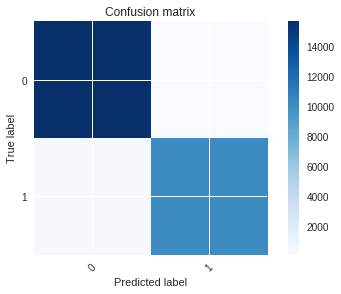


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     15780
           1       0.99      0.98      0.98     10426

   micro avg       0.99      0.99      0.99     26206
   macro avg       0.99      0.99      0.99     26206
weighted avg       0.99      0.99      0.99     26206



In [60]:
y_pred_lr = clf_lr.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_lr[:10])

print()

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

print()
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_lr))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_lr))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_lr)) 
print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_lr, clf_lr.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_lr))

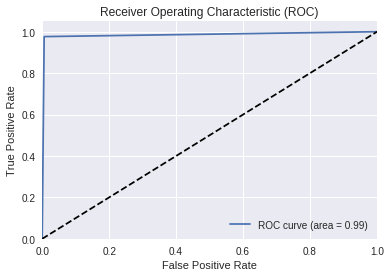

In [61]:
plot_roc(y_pred_lr,y_test)

# **Neural Network Model**

In [62]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
# columns
columns_new = ['y']

# pass in array and columns
dataframe_y = pd.DataFrame(y_binary , columns=columns_new)

In [0]:
encode_text_dummy(dataframe_y,'y')

In [0]:
y_tns_binary = dataframe_y.values

In [66]:
y_tns_binary.shape

(145586, 2)

In [0]:
X_tns_train,X_tns_test,y_tns_train,y_tns_test = train_test_split(X,y_tns_binary,test_size=0.20,random_state=1)

## **Relu With Adam**

In [68]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(50,input_dim=X_tns_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(50,activation='relu')) # Hidden 2
    model_classification.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 116468 samples, validate on 29118 samples
Epoch 1/100
 - 5s - loss: 0.0296 - val_loss: 0.0120
Epoch 2/100
 - 4s - loss: 0.0083 - val_loss: 0.0084
Epoch 3/100
 - 4s - loss: 0.0065 - val_loss: 0.0091
Epoch 4/100
 - 4s - loss: 0.0061 - val_loss: 0.0085
Epoch 5/100
 - 4s - loss: 0.0055 - val_loss: 0.0081
Epoch 6/100
 - 4s - loss: 0.0049 - val_loss: 0.0079
Epoch 7/100
 - 4s - loss: 0.0050 - val_loss: 0.0091
Epoch 00007: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/100
 - 5s - loss: 0.0301 - val_loss: 0.0121
Epoch 2/100
 - 4s - loss: 0.0089 - val_loss: 0.0139
Epoch 3/100
 - 4s - loss: 0.0069 - val_loss: 0.0100
Epoch 4/100
 - 4s - loss: 0.0059 - val_loss: 0.0076
Epoch 5/100
 - 4s - loss: 0.0055 - val_loss: 0.0075
Epoch 6/100
 - 4s - loss: 0.0051 - val_loss: 0.0084
Epoch 7/100
 - 4s - loss: 0.0047 - val_loss: 0.0075
Epoch 8/100
 - 4s 

Precision score : 0.9982683982683983
Recall score    : 0.997491132450904
F1 score        : 0.9978796140032022

[[17539    20]
 [   29 11530]]

Plotting confusion matrix


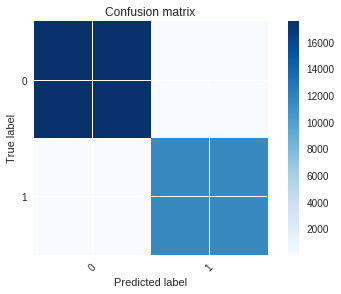

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [69]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights.hdf5')

pred = model_classification.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

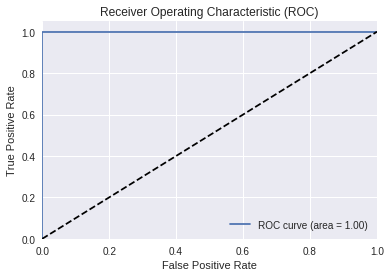

In [70]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights.hdf5')

pred = model_classification.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)


## **Sigmoid and Adam**

In [71]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_1 = Sequential()
    model_classification_1.add(Dense(50,input_dim=X_tns_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_1.add(Dense(50,activation='sigmoid')) # Hidden 2
    model_classification_1.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_1.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_1.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0712 - val_loss: 0.0438
Epoch 2/1000
 - 4s - loss: 0.0373 - val_loss: 0.0379
Epoch 3/1000
 - 4s - loss: 0.0341 - val_loss: 0.0364
Epoch 4/1000
 - 4s - loss: 0.0323 - val_loss: 0.0335
Epoch 5/1000
 - 5s - loss: 0.0302 - val_loss: 0.0328
Epoch 6/1000
 - 4s - loss: 0.0275 - val_loss: 0.0293
Epoch 7/1000
 - 5s - loss: 0.0241 - val_loss: 0.0250
Epoch 8/1000
 - 5s - loss: 0.0205 - val_loss: 0.0257
Epoch 9/1000
 - 5s - loss: 0.0172 - val_loss: 0.0189
Epoch 10/1000
 - 5s - loss: 0.0145 - val_loss: 0.0185
Epoch 11/1000
 - 4s - loss: 0.0122 - val_loss: 0.0151
Epoch 12/1000
 - 4s - loss: 0.0108 - val_loss: 0.0136
Epoch 13/1000
 - 4s - loss: 0.0098 - val_loss: 0.0134
Epoch 14/1000
 - 4s - loss: 0.0092 - val_loss: 0.0124
Epoch 15/1000
 - 5s - loss: 0.0087 - val_loss: 0.0116
Epoch 16/1000
 - 5s - loss: 0.0083 - val_loss: 0.0113
Epoch 17/1000
 - 5s - loss: 0.0079 - val_loss: 0.0107
Epoch 18/1000
 - 4s - loss: 0.0075 - v

Precision score : 0.9974039460020768
Recall score    : 0.997145081754477
F1 score        : 0.9972744970798183

[[17529    30]
 [   33 11526]]

Plotting confusion matrix


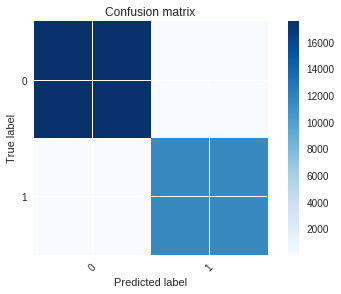

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [72]:
model_classification_1.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_1.hdf5')

pred = model_classification_1.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

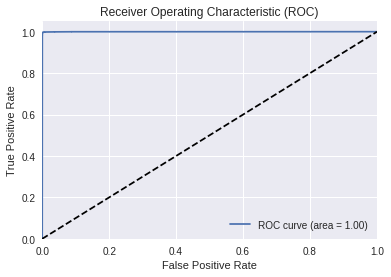

In [73]:
model_classification_1.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_1.hdf5')

pred = model_classification_1.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

##** Tanh with Adam**

In [74]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_2 = Sequential()
    model_classification_2.add(Dense(50,input_dim=X_tns_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_2.add(Dense(50,activation='tanh')) # Hidden 2
    model_classification_2.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_2.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_2.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/100
 - 6s - loss: 0.0424 - val_loss: 0.0295
Epoch 2/100
 - 5s - loss: 0.0215 - val_loss: 0.0174
Epoch 3/100
 - 5s - loss: 0.0112 - val_loss: 0.0123
Epoch 4/100
 - 5s - loss: 0.0085 - val_loss: 0.0103
Epoch 5/100
 - 5s - loss: 0.0076 - val_loss: 0.0093
Epoch 6/100
 - 5s - loss: 0.0068 - val_loss: 0.0093
Epoch 7/100
 - 5s - loss: 0.0066 - val_loss: 0.0088
Epoch 8/100
 - 5s - loss: 0.0058 - val_loss: 0.0091
Epoch 9/100
 - 5s - loss: 0.0058 - val_loss: 0.0090
Epoch 10/100
 - 5s - loss: 0.0056 - val_loss: 0.0093
Epoch 11/100
 - 5s - loss: 0.0053 - val_loss: 0.0075
Epoch 12/100
 - 5s - loss: 0.0051 - val_loss: 0.0086
Epoch 13/100
 - 5s - loss: 0.0051 - val_loss: 0.0079
Epoch 14/100
 - 5s - loss: 0.0047 - val_loss: 0.0078
Epoch 15/100
 - 5s - loss: 0.0047 - val_loss: 0.0087
Epoch 16/100
 - 5s - loss: 0.0043 - val_loss: 0.0075
Epoch 00016: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/100
 - 6s - loss: 0

Precision score : 0.9984415584415585
Recall score    : 0.9976641577991175
F1 score        : 0.9980527067376346

[[17541    18]
 [   27 11532]]

Plotting confusion matrix


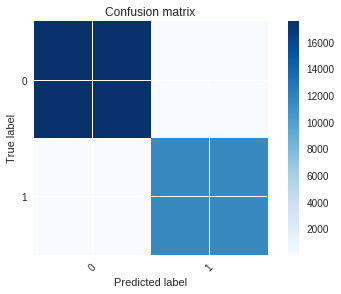

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [75]:
model_classification_2.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_2.hdf5')

pred = model_classification_2.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

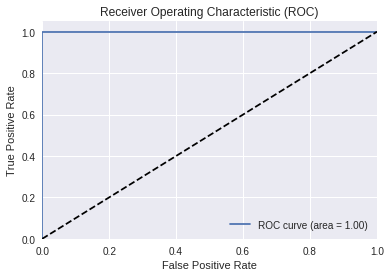

In [76]:
model_classification_2.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_2.hdf5')

pred = model_classification_2.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

## **Relu With SGD**

In [77]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_3 = Sequential()
    model_classification_3.add(Dense(50,input_dim=X_tns_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_3.add(Dense(50,activation='relu')) # Hidden 2
    model_classification_3.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_3.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_3.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)

0
Train on 116468 samples, validate on 29118 samples
Epoch 1/100
 - 6s - loss: 0.0925 - val_loss: 0.0587
Epoch 2/100
 - 5s - loss: 0.0472 - val_loss: 0.0460
Epoch 3/100
 - 5s - loss: 0.0393 - val_loss: 0.0405
Epoch 4/100
 - 5s - loss: 0.0353 - val_loss: 0.0379
Epoch 5/100
 - 5s - loss: 0.0325 - val_loss: 0.0351
Epoch 6/100
 - 5s - loss: 0.0303 - val_loss: 0.0327
Epoch 7/100
 - 5s - loss: 0.0284 - val_loss: 0.0314
Epoch 8/100
 - 5s - loss: 0.0268 - val_loss: 0.0307
Epoch 9/100
 - 5s - loss: 0.0255 - val_loss: 0.0284
Epoch 10/100
 - 5s - loss: 0.0243 - val_loss: 0.0281
Epoch 11/100
 - 5s - loss: 0.0233 - val_loss: 0.0259
Epoch 12/100
 - 5s - loss: 0.0222 - val_loss: 0.0247
Epoch 13/100
 - 5s - loss: 0.0215 - val_loss: 0.0239
Epoch 14/100
 - 5s - loss: 0.0206 - val_loss: 0.0233
Epoch 15/100
 - 5s - loss: 0.0200 - val_loss: 0.0231
Epoch 16/100
 - 5s - loss: 0.0192 - val_loss: 0.0231
Epoch 17/100
 - 5s - loss: 0.0187 - val_loss: 0.0208
Epoch 18/100
 - 5s - loss: 0.0180 - val_loss: 0.0218
Ep

Precision score : 0.9978351229650156
Recall score    : 0.9968855437321568
F1 score        : 0.9973601073267842

[[17534    25]
 [   36 11523]]

Plotting confusion matrix


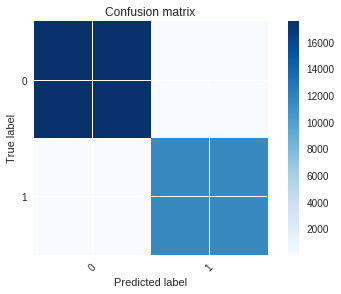

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [78]:
model_classification_3.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_3.hdf5')

pred = model_classification_3.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

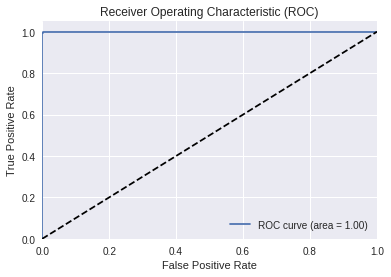

In [79]:
model_classification_3.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_3.hdf5')

pred = model_classification_3.predict(X_tns_test)
pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

# **CNN**

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras import regularizers

In [0]:
X_tns_re_train = X_tns_train.reshape(X_tns_train.shape[0], 1, X_tns_train.shape[1], 1)
X_tns_re_test = X_tns_test.reshape(X_tns_test.shape[0], 1, X_tns_test.shape[1], 1)

In [0]:
input_shape=(1,X_tns_train.shape[1],1)

## **Relu and Softmax**

In [83]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1),activation='relu',input_shape=input_shape,padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 1),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 120, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 60, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 60, 64)         6208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 30, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 500)               960500    
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 1002      
Total para

In [84]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)   
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
    cnn_model.fit(X_tns_re_train[0:5000], y_tns_train[0:5000],batch_size=128,validation_data=(X_tns_re_test[0:1000],y_tns_test[0:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 4s - loss: 0.1296 - val_loss: 0.0746
Epoch 2/1000
 - 2s - loss: 0.0521 - val_loss: 0.0629
Epoch 3/1000
 - 2s - loss: 0.0420 - val_loss: 0.0668
Epoch 4/1000
 - 2s - loss: 0.0378 - val_loss: 0.0588
Epoch 5/1000
 - 2s - loss: 0.0319 - val_loss: 0.0643
Epoch 6/1000
 - 2s - loss: 0.0455 - val_loss: 0.0606
Epoch 00006: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 4s - loss: 0.0327 - val_loss: 0.0477
Epoch 2/1000
 - 2s - loss: 0.0271 - val_loss: 0.0583
Epoch 3/1000
 - 2s - loss: 0.0274 - val_loss: 0.0392
Epoch 4/1000
 - 2s - loss: 0.0229 - val_loss: 0.0404
Epoch 5/1000
 - 2s - loss: 0.0232 - val_loss: 0.0354
Epoch 6/1000
 - 2s - loss: 0.0311 - val_loss: 0.0437
Epoch 7/1000
 - 2s - loss: 0.0221 - val_loss: 0.0372
Epoch 00007: early stopping
2
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 4s - loss: 0.0173 - val_loss: 0.0255
Epoch 2/1000
 - 2s - loss: 0.0130 - val_loss: 0.0259

Precision score : 0.9924183006535948
Recall score    : 0.9852063327277446
F1 score        : 0.9887991664495963

[[17472    87]
 [  171 11388]]

Plotting confusion matrix


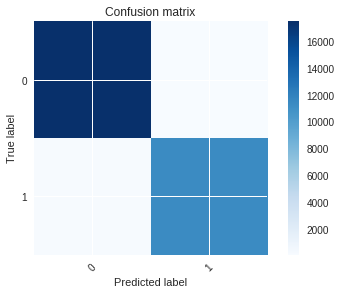

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17559
           1       0.99      0.99      0.99     11559

   micro avg       0.99      0.99      0.99     29118
   macro avg       0.99      0.99      0.99     29118
weighted avg       0.99      0.99      0.99     29118



In [85]:
cnn_model.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights.hdf5')

pred = cnn_model.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

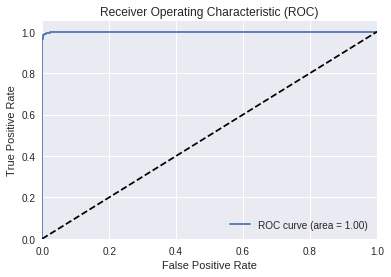

In [86]:
cnn_model.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights.hdf5')

pred = cnn_model.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

## **Sigmoid and Softmax**

In [87]:
cnn_model_1 = Sequential()
cnn_model_1.add(Conv2D(32, kernel_size=(1, 5), strides=(1, 1),activation='sigmoid',input_shape=input_shape,padding='same'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_1.add(Conv2D(64, kernel_size=(1, 5), strides=(1, 1),activation='sigmoid',padding='same'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(500, activation='sigmoid'))
cnn_model_1.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1, 120, 32)        192       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 60, 32)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 60, 64)         10304     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 30, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 500)               960500    
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 1002      
Total para

In [88]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)   
    cnn_model_1.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=2, verbose=1, mode='auto')
    cnn_model_1.fit(X_tns_re_train[:5000], y_tns_train[:5000],batch_size=128,validation_data=(X_tns_re_test[:1000],y_tns_test[:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 4s - loss: 0.8000 - val_loss: 0.6800
Epoch 2/1000
 - 2s - loss: 0.6724 - val_loss: 0.6749
Epoch 3/1000
 - 2s - loss: 0.6717 - val_loss: 0.6573
Epoch 4/1000
 - 2s - loss: 0.6458 - val_loss: 0.6167
Epoch 5/1000
 - 2s - loss: 0.5469 - val_loss: 0.3912
Epoch 6/1000
 - 2s - loss: 0.2281 - val_loss: 0.1562
Epoch 7/1000
 - 2s - loss: 0.1218 - val_loss: 0.1383
Epoch 8/1000
 - 2s - loss: 0.1094 - val_loss: 0.1283
Epoch 9/1000
 - 2s - loss: 0.0956 - val_loss: 0.1210
Epoch 10/1000
 - 2s - loss: 0.0979 - val_loss: 0.1330
Epoch 00010: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 4s - loss: 0.1057 - val_loss: 0.1132
Epoch 2/1000
 - 2s - loss: 0.0837 - val_loss: 0.1291
Epoch 3/1000
 - 2s - loss: 0.0759 - val_loss: 0.1075
Epoch 00003: early stopping
2
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 4s - loss: 0.0814 - val_loss: 0.1041
Epoch 2/1000
 - 2s - loss: 0.0699 - val_loss: 0.097

Precision score : 0.9875781869438816
Recall score    : 0.9698070767367419
F1 score        : 0.9786119598428634

[[17418   141]
 [  349 11210]]

Plotting confusion matrix


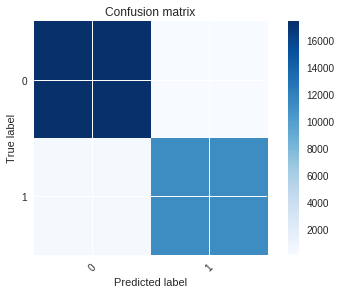

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17559
           1       0.99      0.97      0.98     11559

   micro avg       0.98      0.98      0.98     29118
   macro avg       0.98      0.98      0.98     29118
weighted avg       0.98      0.98      0.98     29118



In [89]:
cnn_model_1.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_1.hdf5')

pred = cnn_model_1.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))